In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from utils import seed_random_generators
seed_random_generators()

In [3]:
from pathlib import Path
from npz_loader import load_episodes

dataset_root = Path("dataset")
holdout_game_dirs = [
    dataset_root.joinpath("BeamRiderNoFrameskip-v4", "BeamRiderNoFrameskip-v4"),
    # dataset_root.joinpath("BreakoutNoFrameskip-v4", "BreakoutNoFrameskip-v4")
]

main_game_dirs = [
    dataset_root.joinpath("EnduroNoFrameskip-v4", "EnduroNoFrameskip-v4"),
    dataset_root.joinpath("MsPacmanNoFrameskip-v4", "MsPacmanNoFrameskip-v4"),
    # dataset_root.joinpath("PongNoFrameskip-v4", "PongNoFrameskip-v4"),
    # dataset_root.joinpath("QbertNoFrameskip-v4", "QbertNoFrameskip-v4"),
    # dataset_root.joinpath("SeaquestNoFrameskip-v4", "SeaquestNoFrameskip-v4"),
    # dataset_root.joinpath("SpaceInvadersNoFrameskip-v4", "SpaceInvadersNoFrameskip-v4")
]
episodes = load_episodes(main_game_dirs, holdout_game_dirs)

Loaded 880 episodes


In [4]:
from utils import sample_list
sampled_episodes = sample_list(episodes, fraction=0.05)

Sampled 44 items (5.0% of 880 total)


In [5]:
from epsiode_dataloader import make_train_val_dataloaders

main_bundle, holdout_bundle, bins = make_train_val_dataloaders(
    episodes=sampled_episodes,
    holdout_game_dirs=holdout_game_dirs,
    train_frac=0.8,

    # We should experiment with this, but it throws off steps being equal in terms of tokens/timesteps seen
    # So I think we keep it as some fixed number for all experiments except for an experiment specifically looking at it
    timestep_window_size=4, 
)

In [6]:
base_dir = Path("output")

# Baseline

In [7]:
# Kenny started this, might just steal those
# Some experiments like freeze below should just use the best params from baseline since there's no changes to the original model,
# but other experiments should find their own best params if there are changes to the model (like patch vs CNN)

# Freeze

[I 2025-12-08 19:39:28,826] A new study created in memory with name: no-name-2e59418d-bd25-4695-b3a8-22a021a34ec6


Trial params: {'lr': 0.0024170099912685455, 'emb_size': 128, 'n_layers': 5, 'n_heads': 4, 'num_epochs': 1}


Epoch 1/1: 100%|██████████| 1148/1148 [01:06<00:00, 17.30it/s]
[I 2025-12-08 19:40:52,489] Trial 0 finished with value: 0.760103166103363 and parameters: {'lr': 0.0024170099912685455, 'emb_size': 128, 'n_layers': 5, 'n_heads': 4, 'num_epochs': 1}. Best is trial 0 with value: 0.760103166103363.
Finetune 1/1: 100%|██████████| 140/140 [00:25<00:00,  5.39it/s]


Model and stats saved to output\freeze_transformer\model_checkpoint.pt
Saved plot to output\freeze_transformer\model_freeze_transformer_-_main_losses_per_head.png


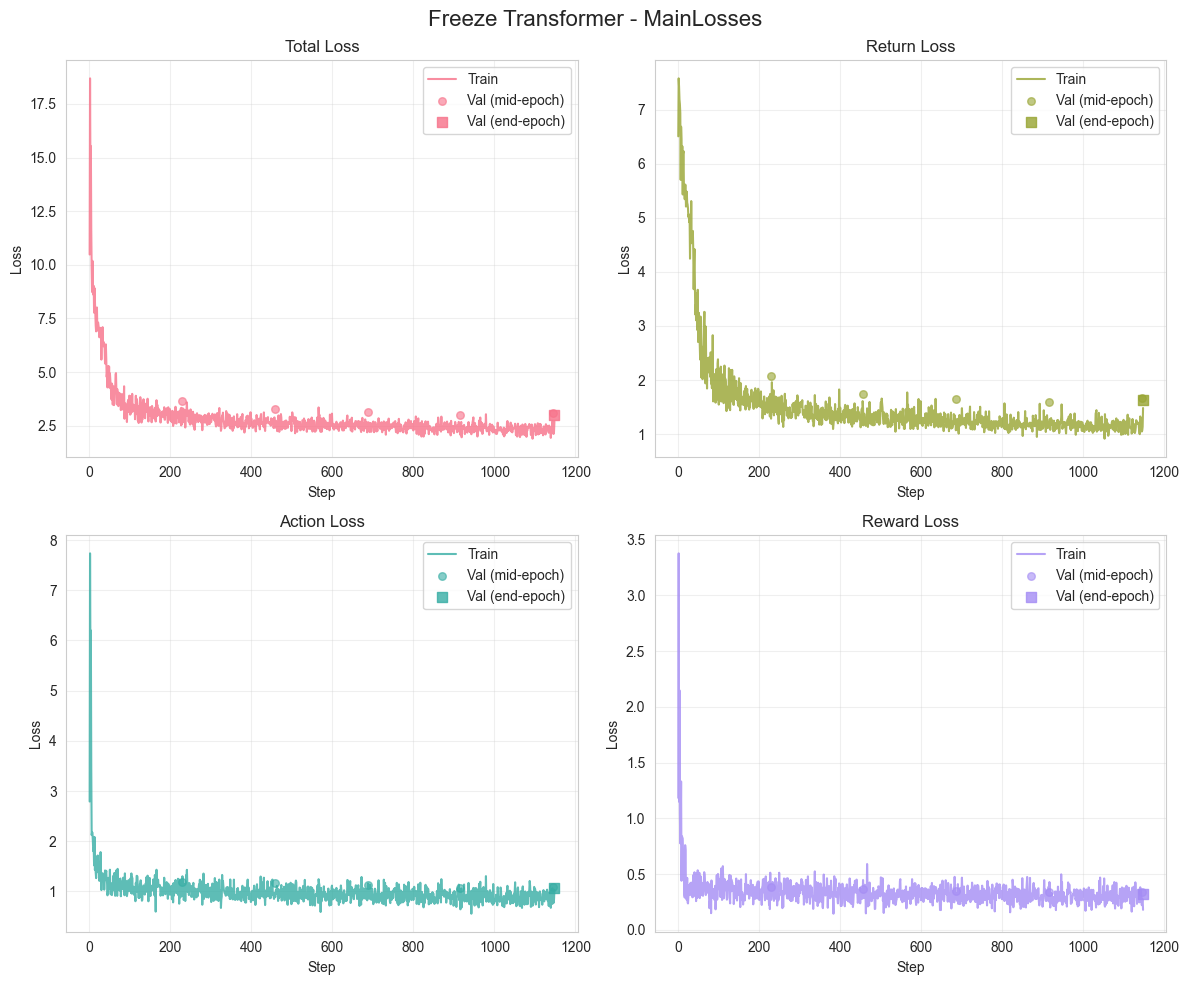

Saved plot to output\freeze_transformer\model_freeze_transformer_-_main_losses_combined.png


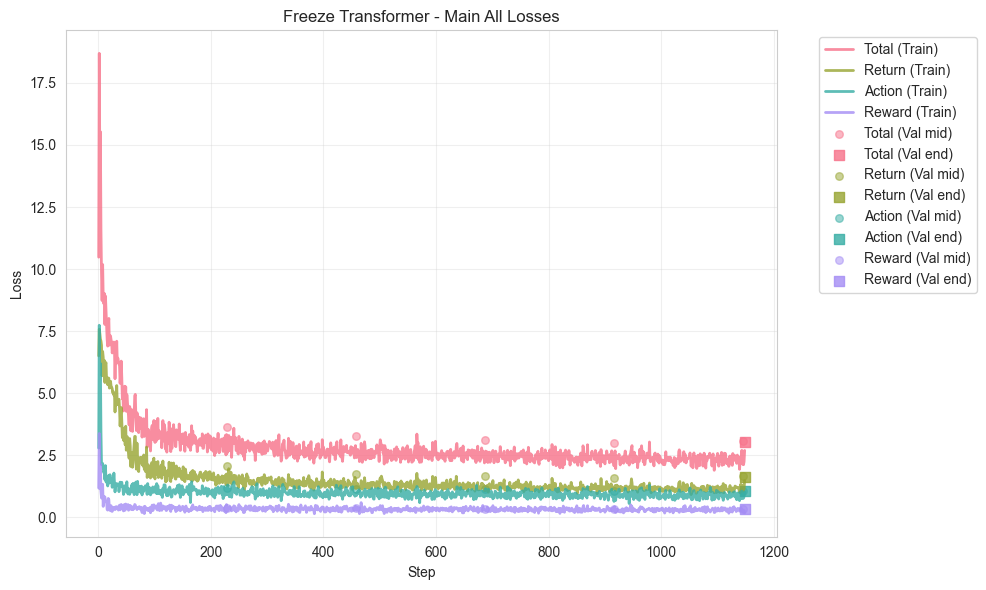

Saved plot to output\freeze_transformer\model_freeze_transformer_-_main_losses_ema_per_head.png


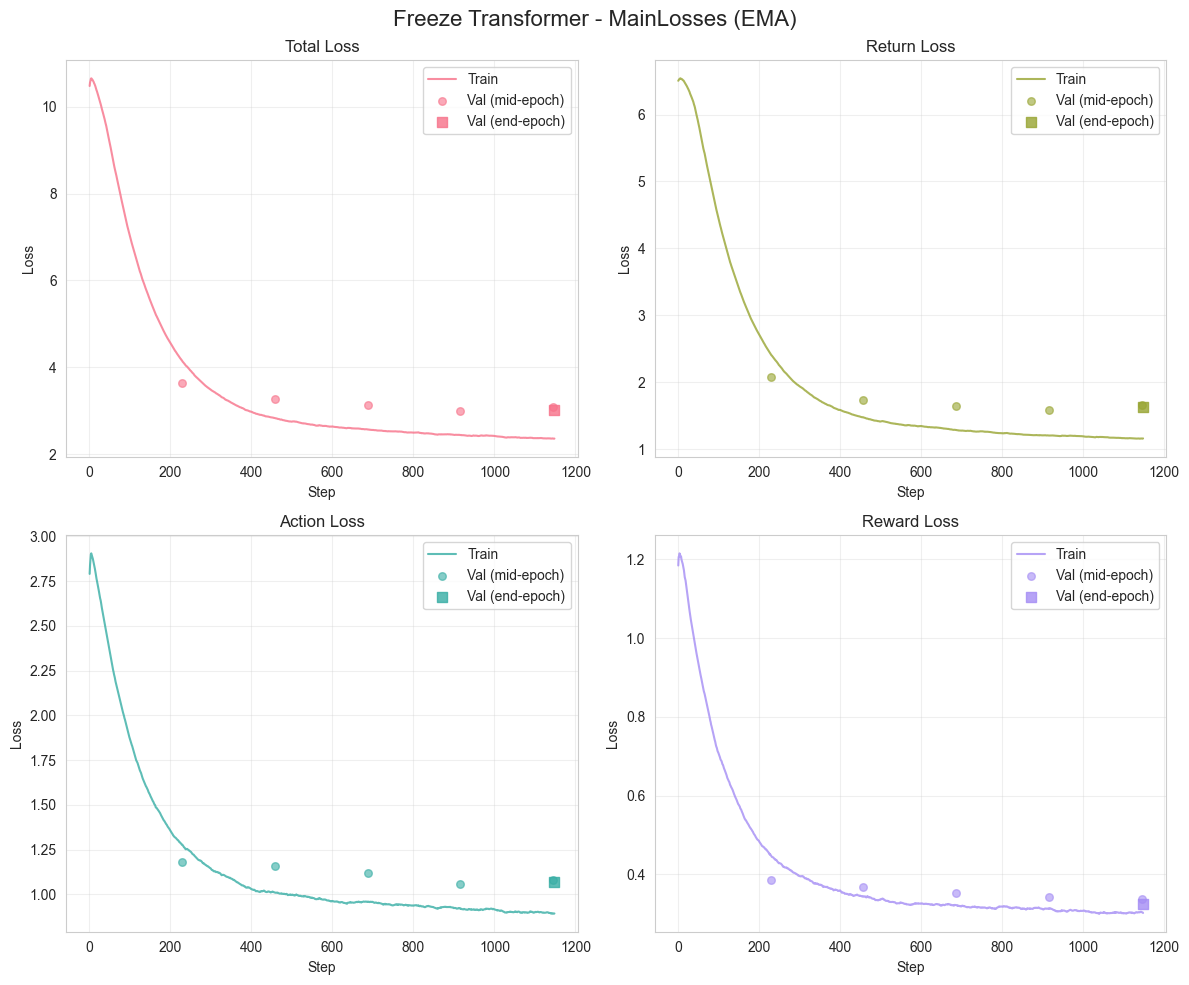

Saved plot to output\freeze_transformer\model_freeze_transformer_-_main_losses_ema_combined.png


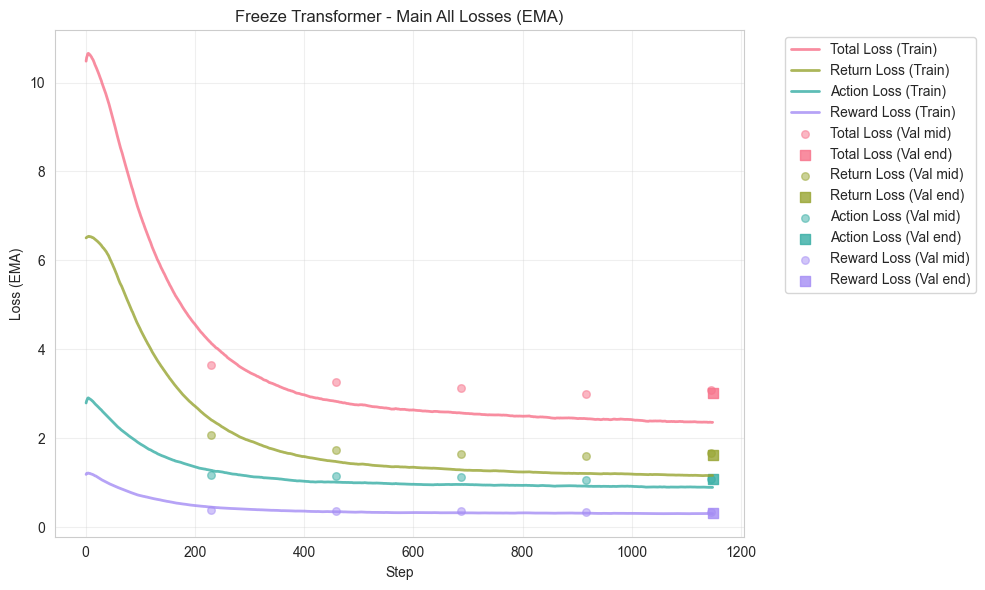

Saved plot to output\freeze_transformer\model_freeze_transformer_-_holdout_losses_per_head.png


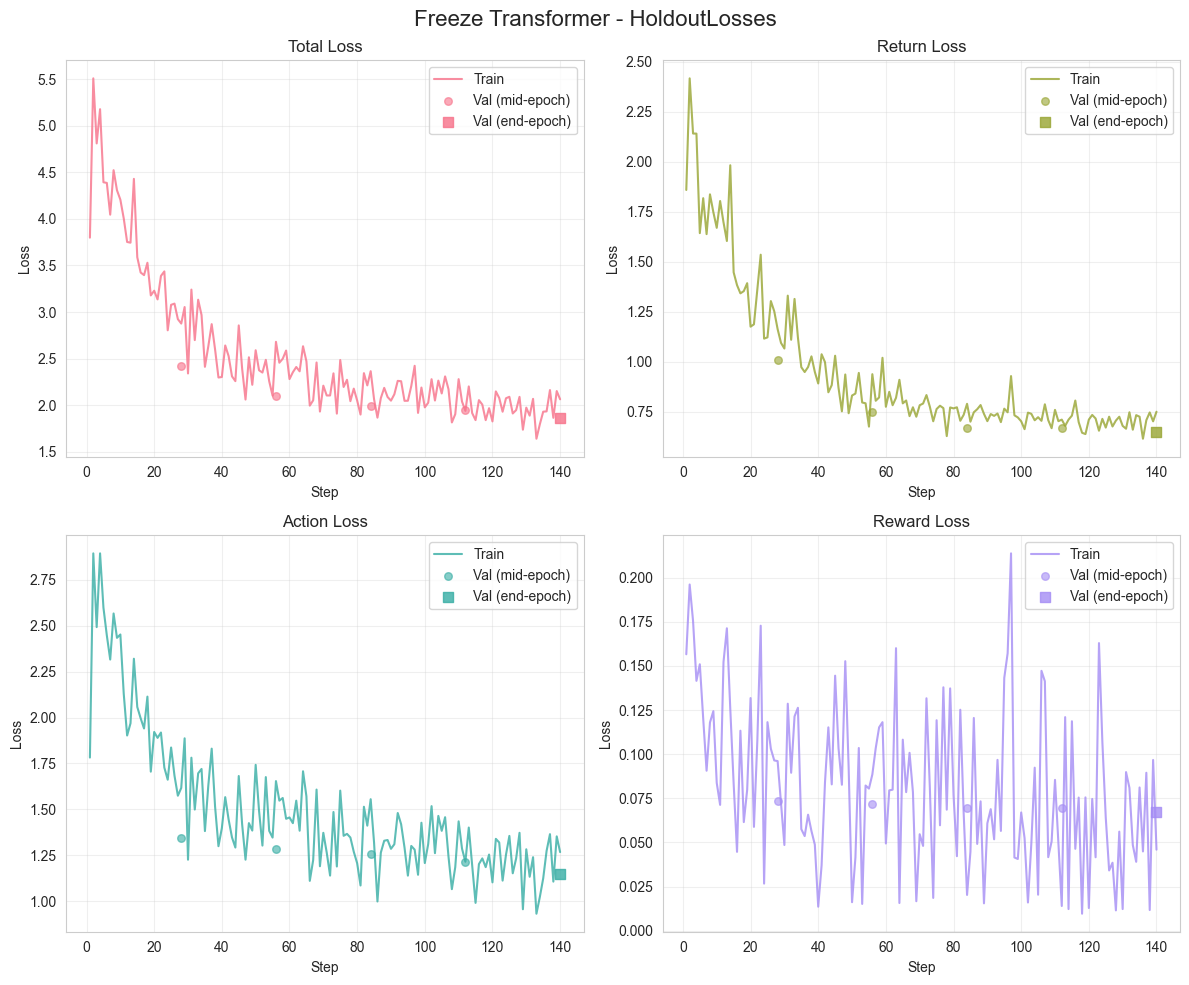

Saved plot to output\freeze_transformer\model_freeze_transformer_-_holdout_losses_combined.png


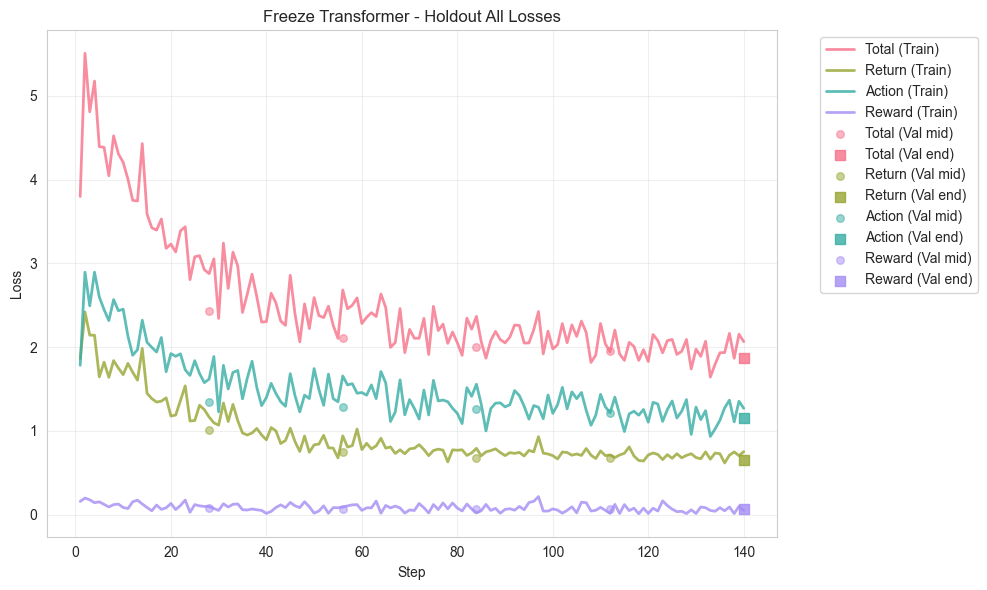

Saved plot to output\freeze_transformer\model_freeze_transformer_-_holdout_losses_ema_per_head.png


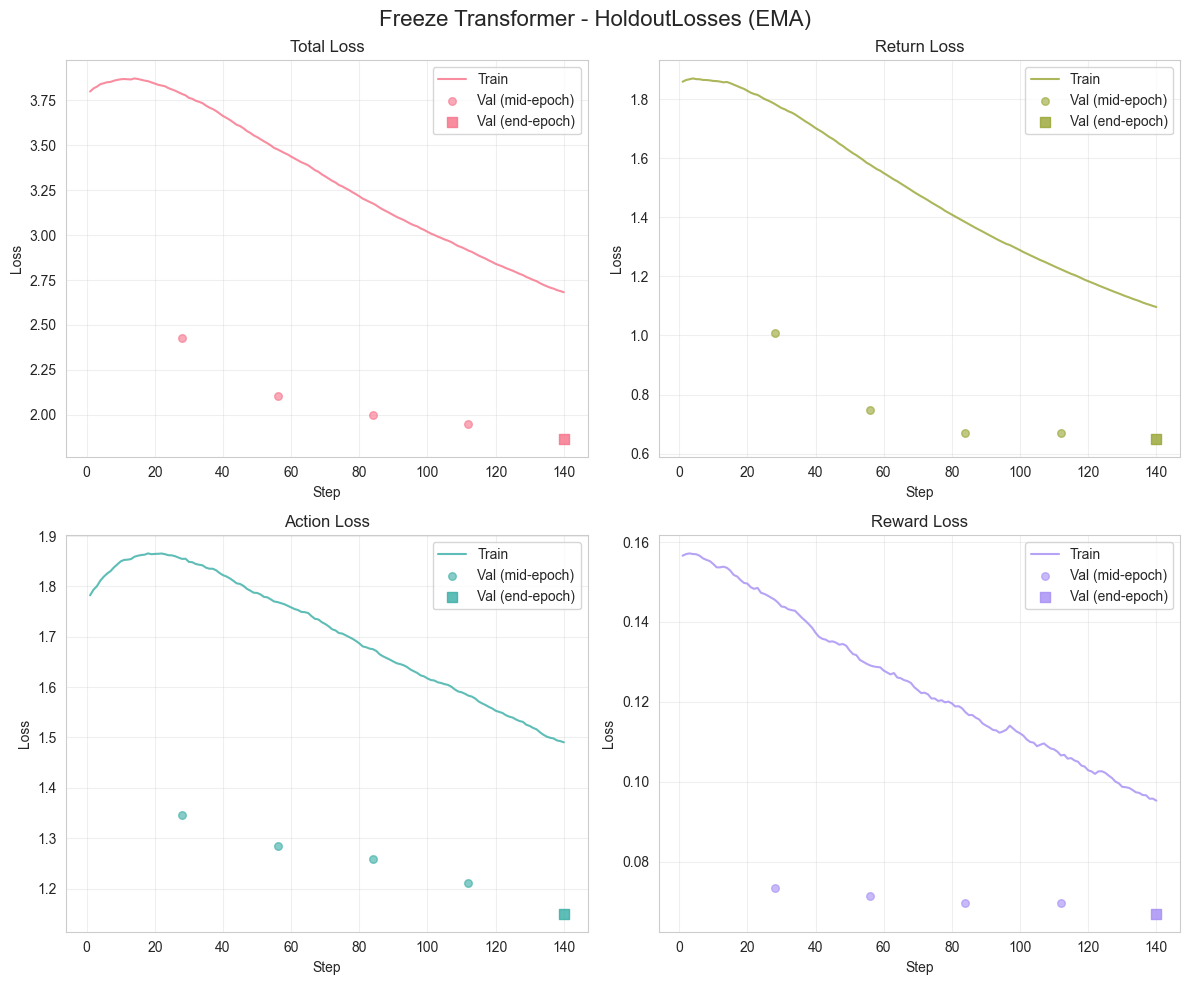

Saved plot to output\freeze_transformer\model_freeze_transformer_-_holdout_losses_ema_combined.png


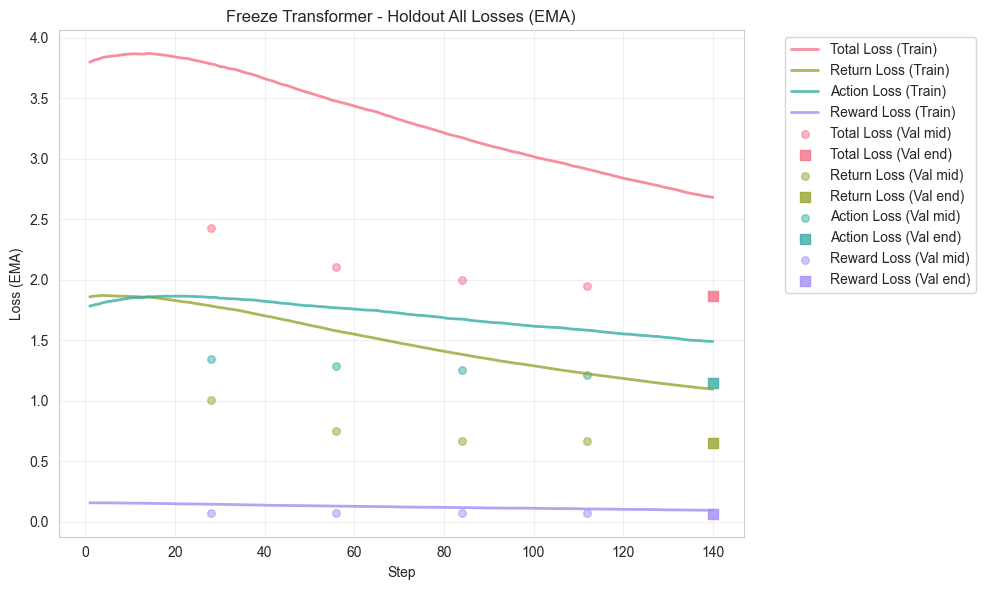

Saved plot to output\freeze_transformer\comparison_freeze_transformer_-_comparison_main_vs_holdout.png


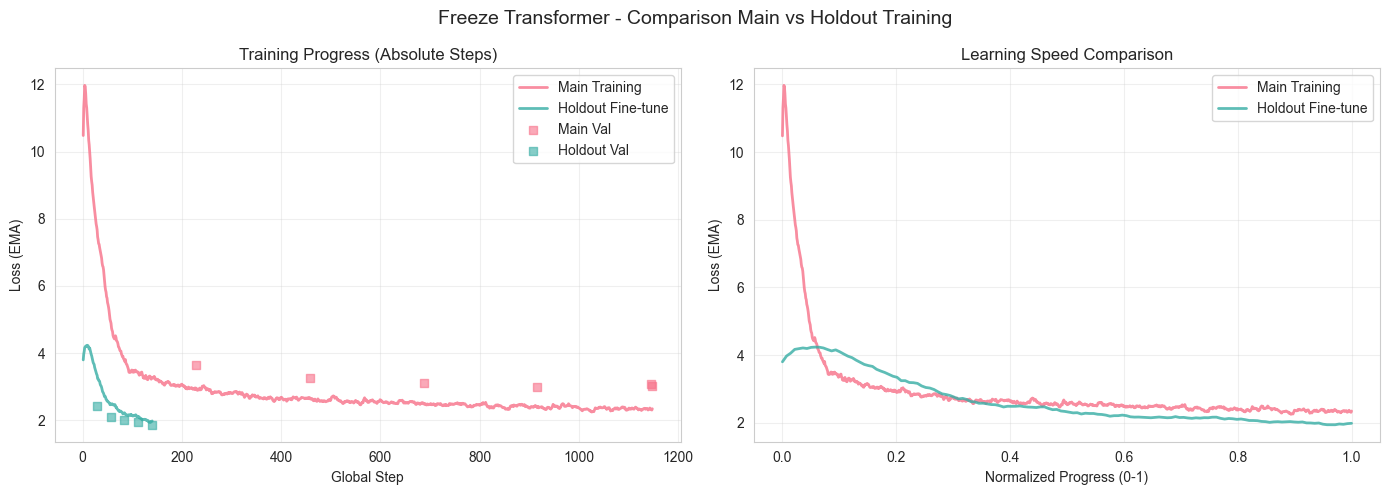

Saved plot to output\freeze_transformer\comparison_freeze_transformer_-_comparison_per_head_loss.png


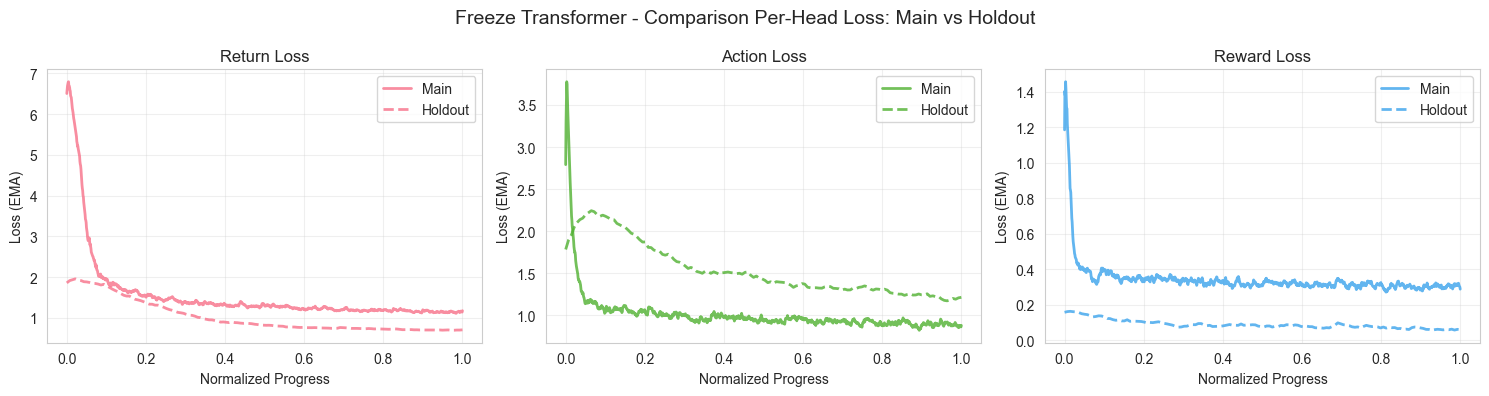

Saved plot to output\freeze_transformer\comparison_freeze_transformer_-_comparison_accuracy.png


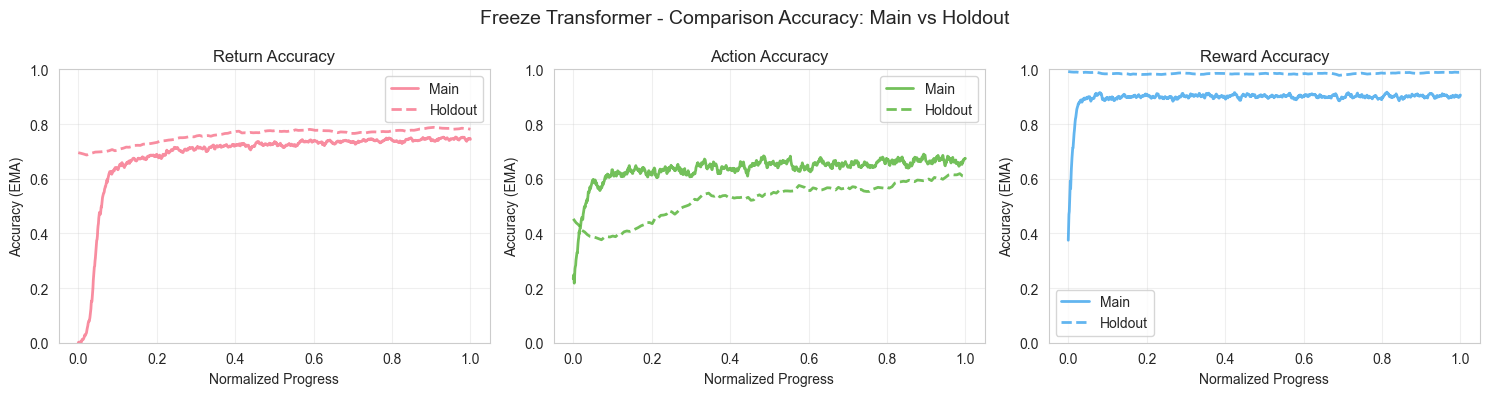


HOLDOUT ADAPTATION SUMMARY
Main training steps: 1148
Holdout fine-tune steps: 140

Main training - Final loss (EMA): 2.3436
Holdout fine-tune - Initial loss (EMA): 3.7988
Holdout fine-tune - Final loss (EMA): 1.9802
Holdout loss reduction: 1.8186

Holdout reached main's final loss at step 70 (50.0% of fine-tuning)


In [8]:
from experiment_freeze import experiment_freeze
from mgdt_model import Freezeable

freeze_params = experiment_freeze(
    title_prefix="Freeze Transformer",
    main_bundle=main_bundle,
    holdout_bundle=holdout_bundle,
    bins=bins,
    freeze_components=[Freezeable.Transformer],
    experiment_dir=base_dir.joinpath("freeze_transformer"),
)  # switch to take best params from baseline later

Finetune 1/1: 100%|██████████| 140/140 [00:28<00:00,  4.87it/s]


Model and stats saved to output\freeze_obs_encoder\model_checkpoint.pt
Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_main_losses_per_head.png


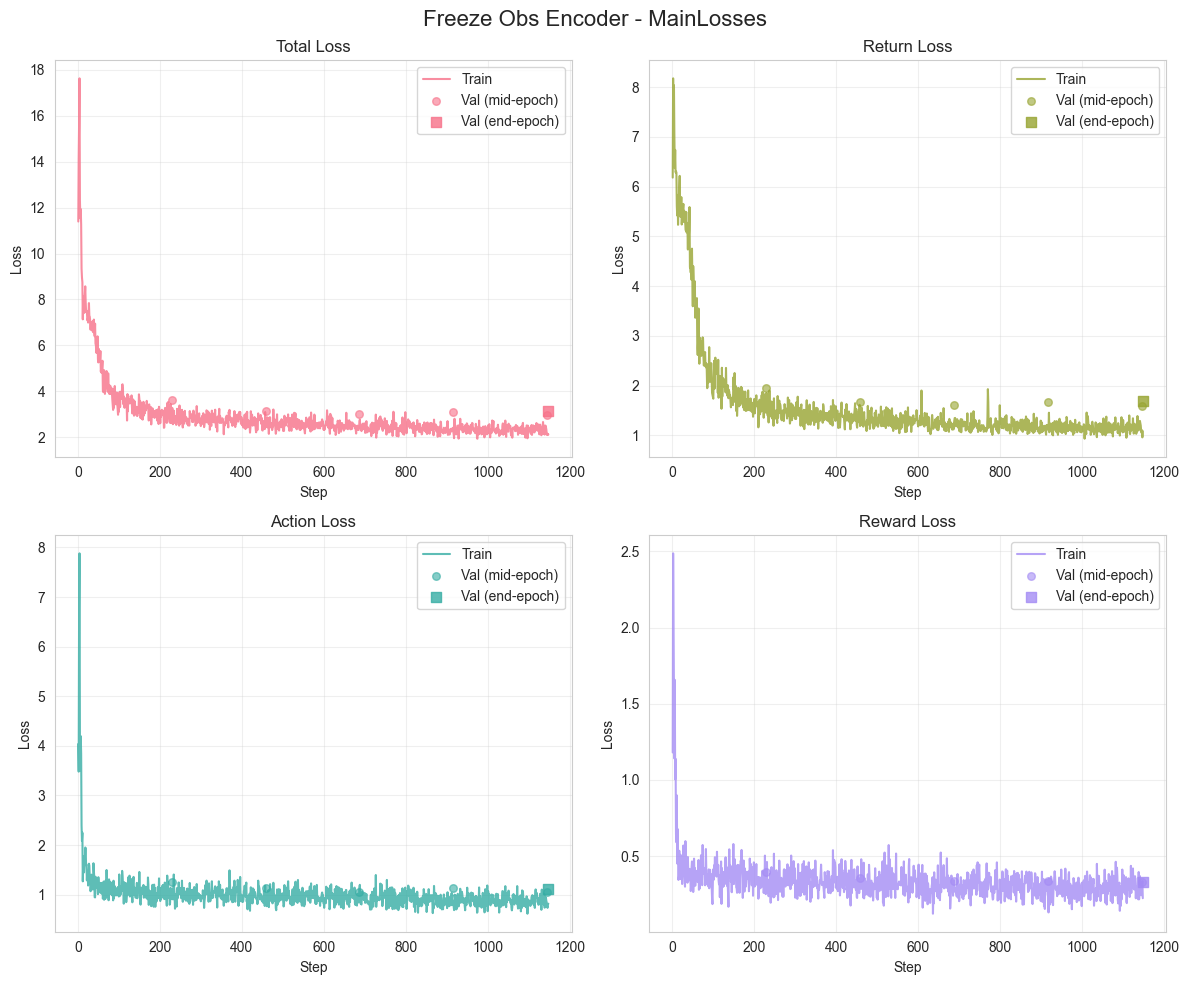

Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_main_losses_combined.png


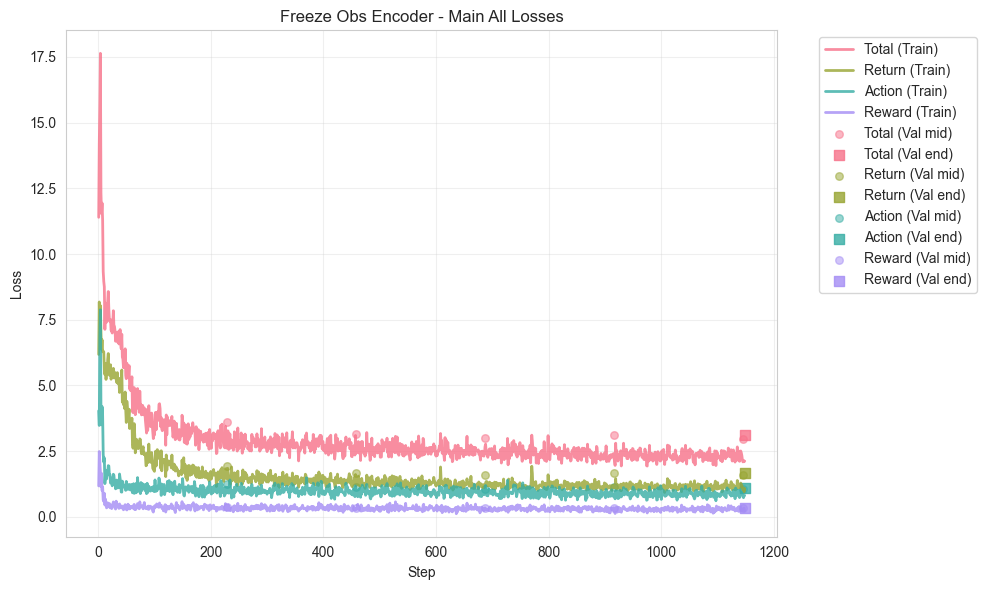

Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_main_losses_ema_per_head.png


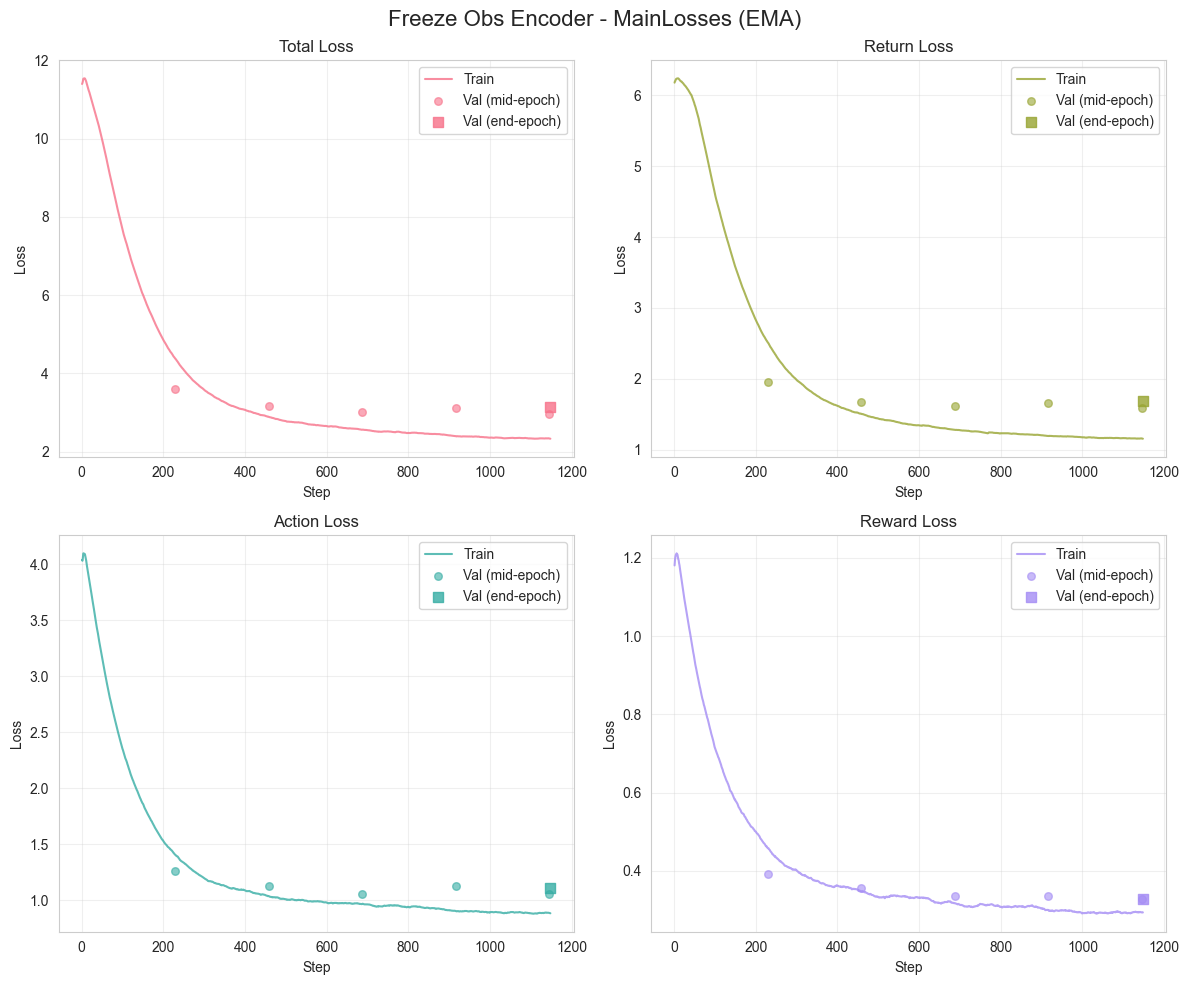

Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_main_losses_ema_combined.png


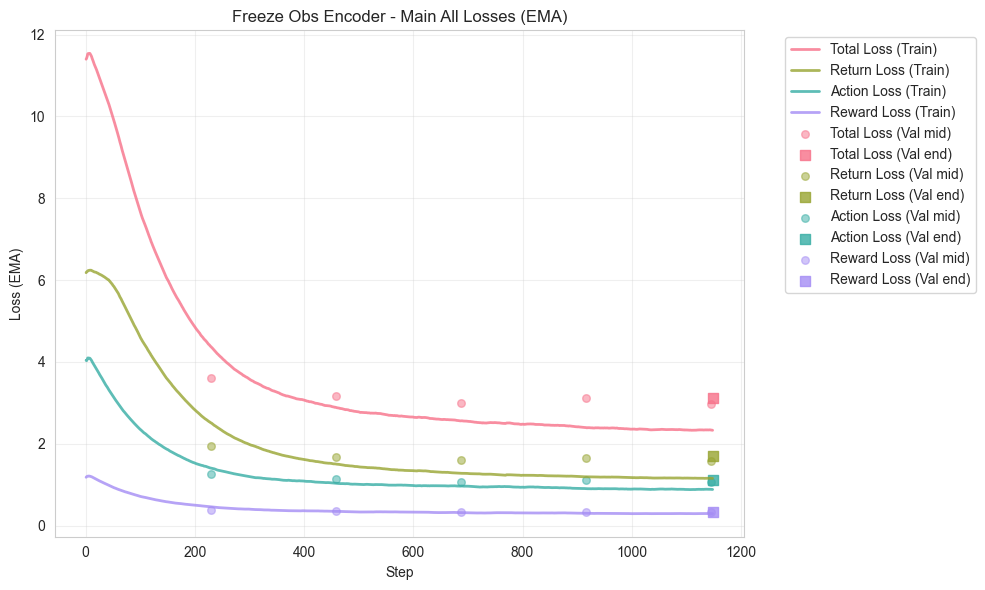

Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_holdout_losses_per_head.png


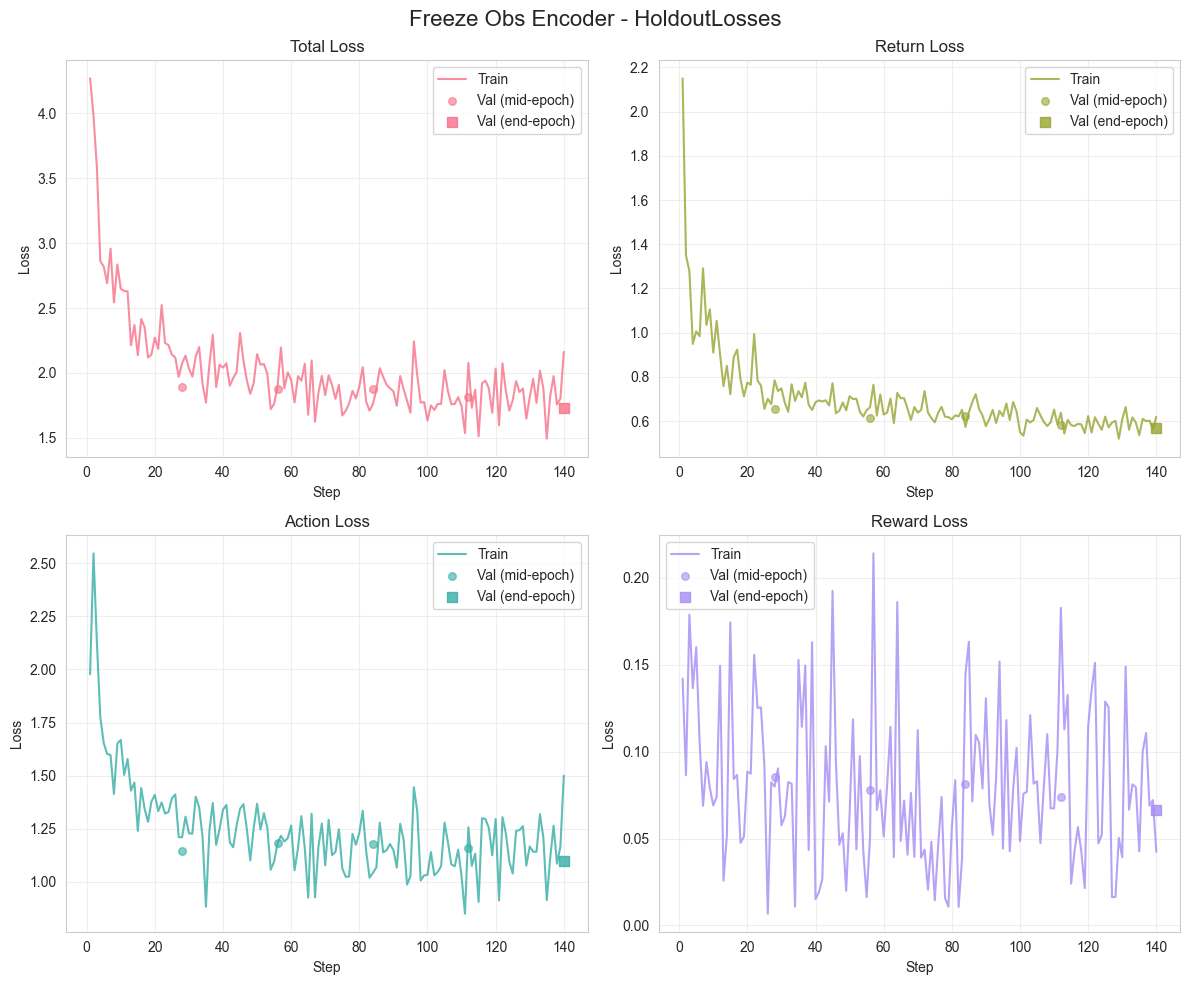

Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_holdout_losses_combined.png


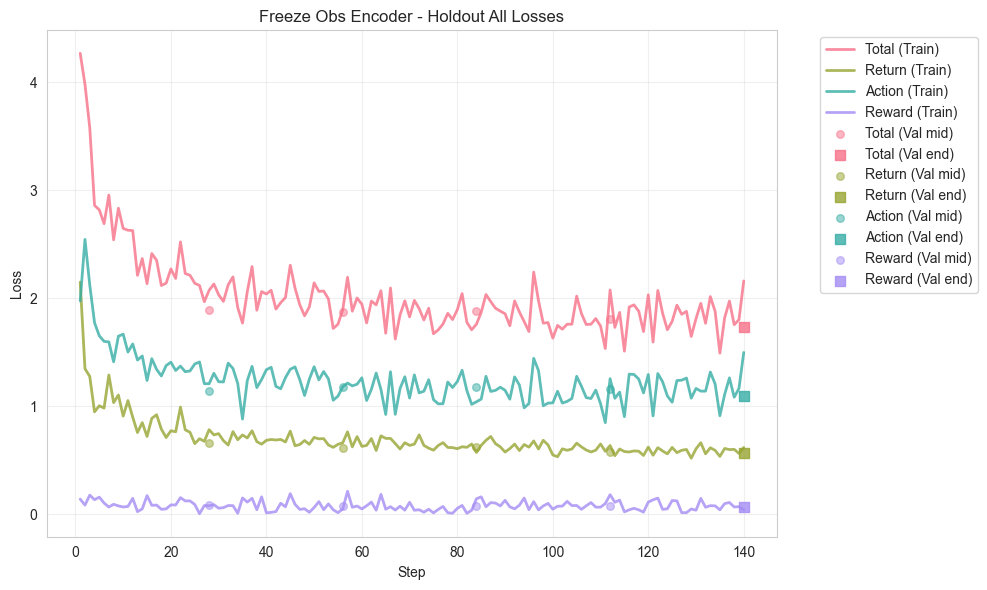

Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_holdout_losses_ema_per_head.png


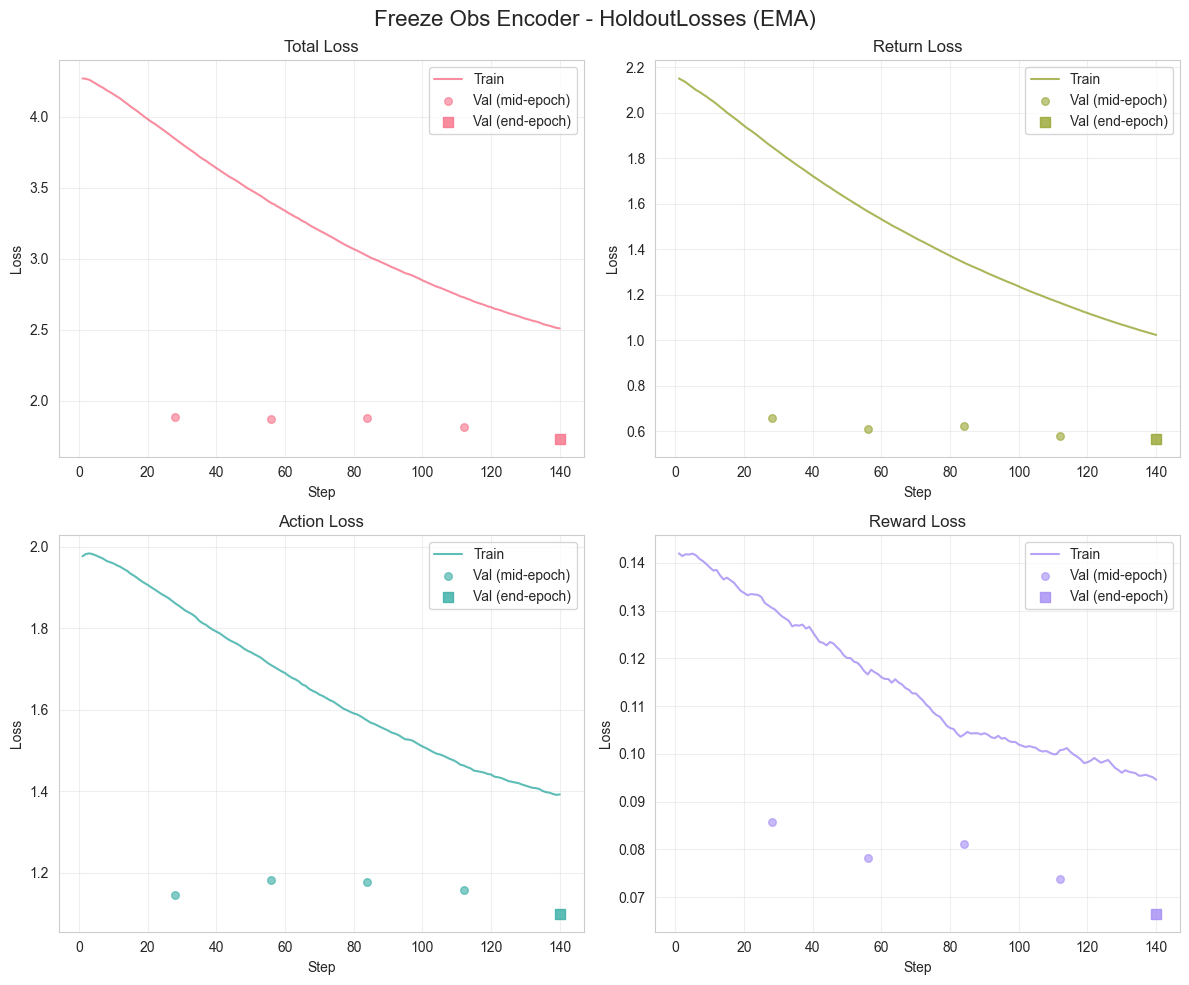

Saved plot to output\freeze_obs_encoder\model_freeze_obs_encoder_-_holdout_losses_ema_combined.png


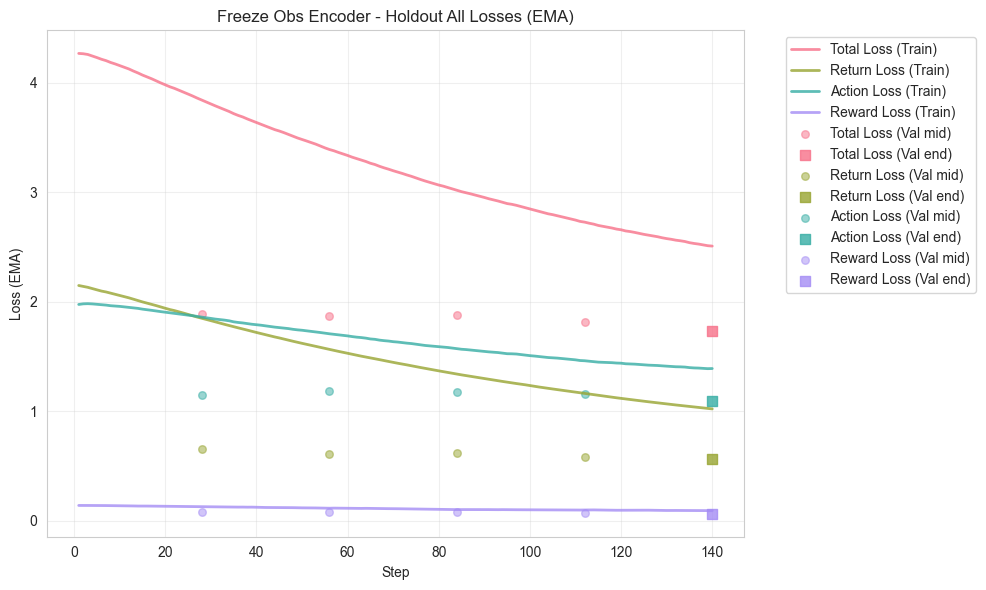

Saved plot to output\freeze_obs_encoder\comparison_freeze_obs_encoder_-_comparison_main_vs_holdout.png


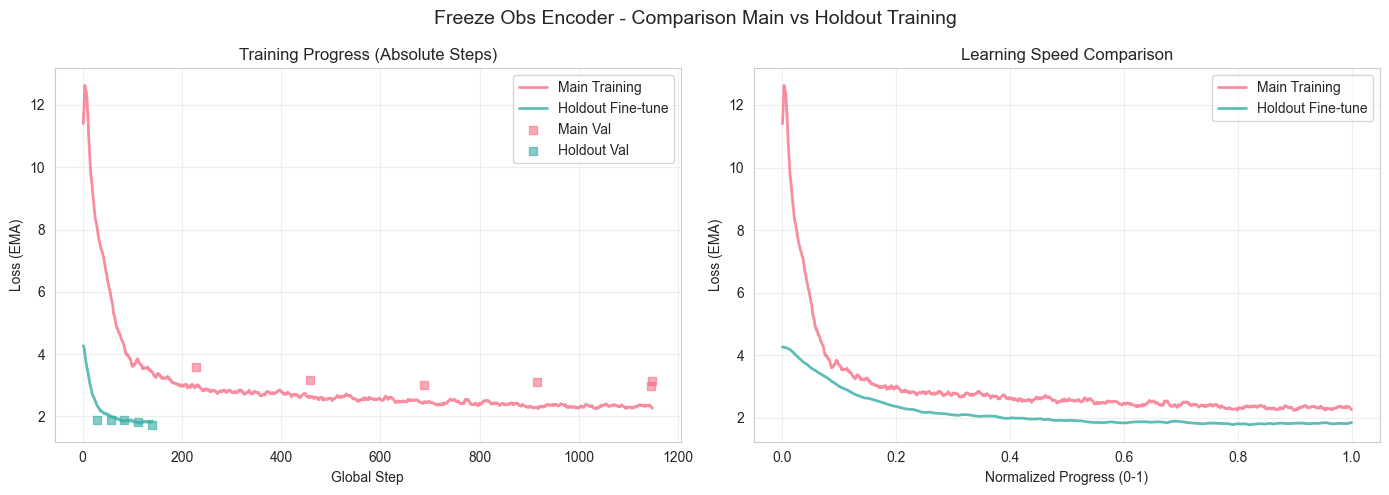

Saved plot to output\freeze_obs_encoder\comparison_freeze_obs_encoder_-_comparison_per_head_loss.png


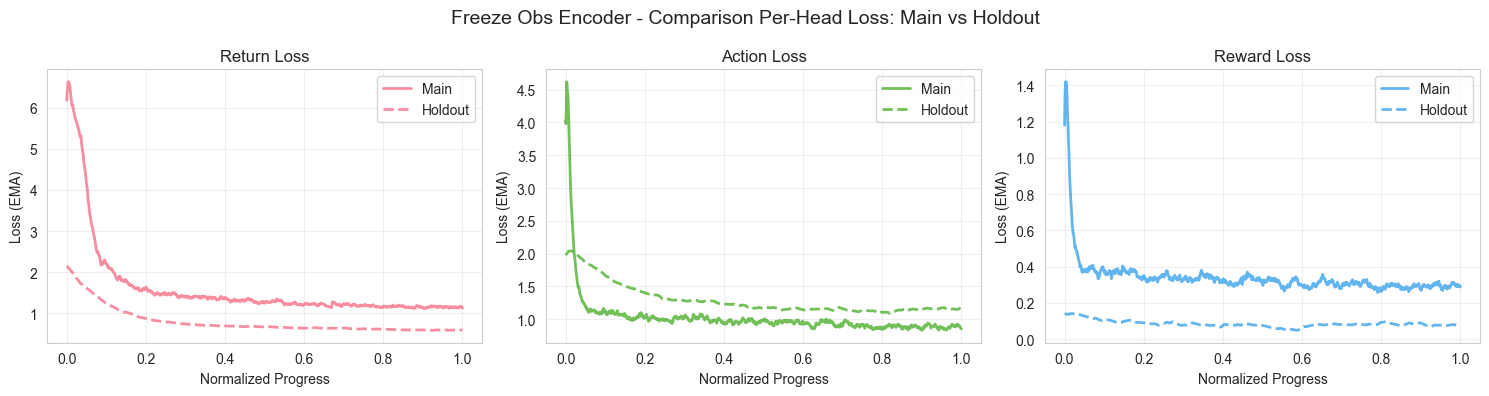

Saved plot to output\freeze_obs_encoder\comparison_freeze_obs_encoder_-_comparison_accuracy.png


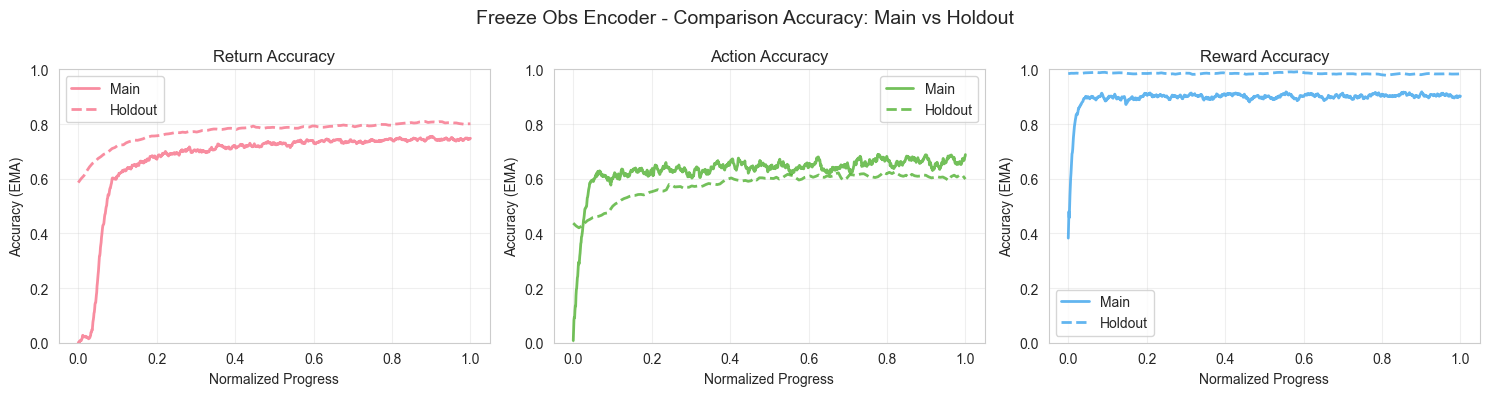


HOLDOUT ADAPTATION SUMMARY
Main training steps: 1148
Holdout fine-tune steps: 140

Main training - Final loss (EMA): 2.2660
Holdout fine-tune - Initial loss (EMA): 4.2689
Holdout fine-tune - Final loss (EMA): 1.8548
Holdout loss reduction: 2.4140

Holdout reached main's final loss at step 34 (24.3% of fine-tuning)


In [12]:
_ = experiment_freeze(
    title_prefix="Freeze Obs Encoder",
    main_bundle=main_bundle,
    holdout_bundle=holdout_bundle,
    bins=bins,
    freeze_components=[Freezeable.ObsEncoder],
    experiment_dir=base_dir.joinpath("freeze_obs_encoder"),
    best_params=freeze_params,
)

# Comparison 
## *Keep this at bottom of notebook and add new experiments to it*

In [13]:
from utils import load_checkpoint
from mgdt_model_stats import ExperimentData

def load_experiment_data(name: str, output_dir: Path) -> ExperimentData:
    checkpoint = load_checkpoint(output_dir)
    return ExperimentData(
        name=name,
        main_train_stats=checkpoint.main_train_stats,
        main_val_stats=checkpoint.main_val_stats,
        holdout_train_stats=checkpoint.holdout_train_stats,
        holdout_val_stats=checkpoint.holdout_val_stats,
    )

Loaded checkpoint from output\freeze_transformer\model_checkpoint.pt
Loaded checkpoint from output\freeze_obs_encoder\model_checkpoint.pt
Saved plot to output\experiment_comparison\experiment_comparison_holdout_val_loss.png


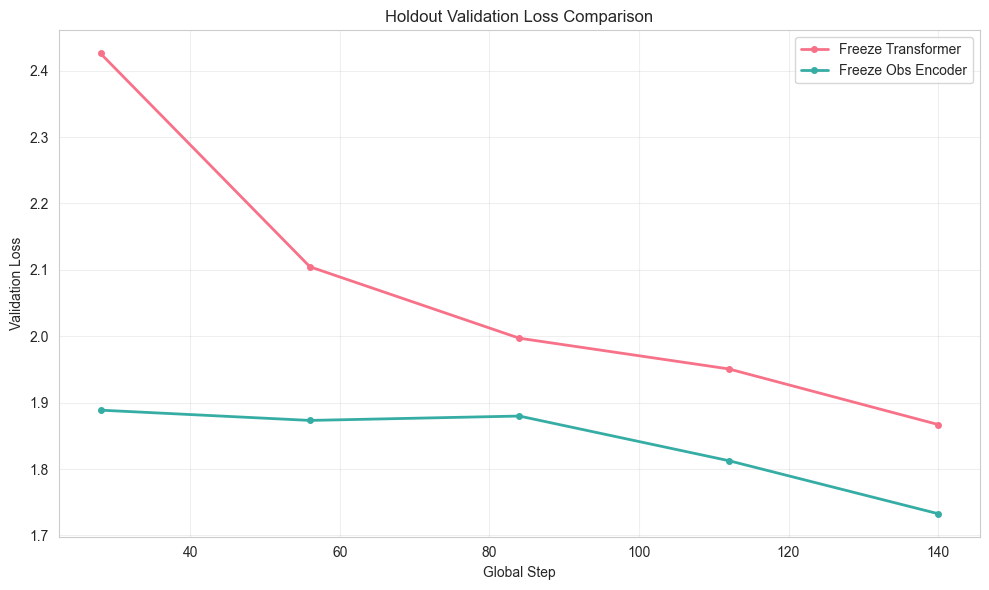

Saved plot to output\experiment_comparison\experiment_comparison_holdout_train_f1.png


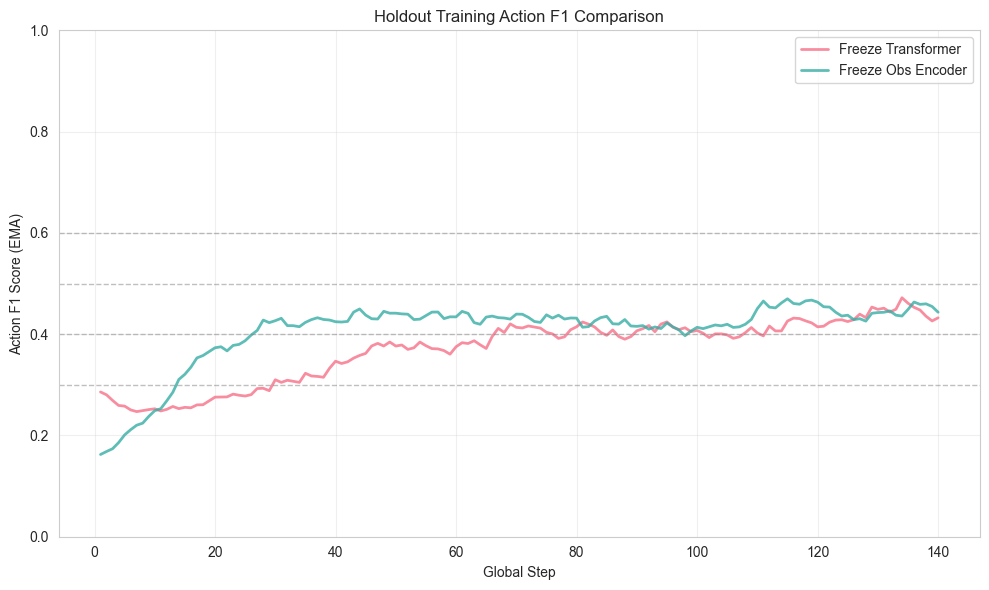

Saved plot to output\experiment_comparison\experiment_comparison_steps_to_f1.png


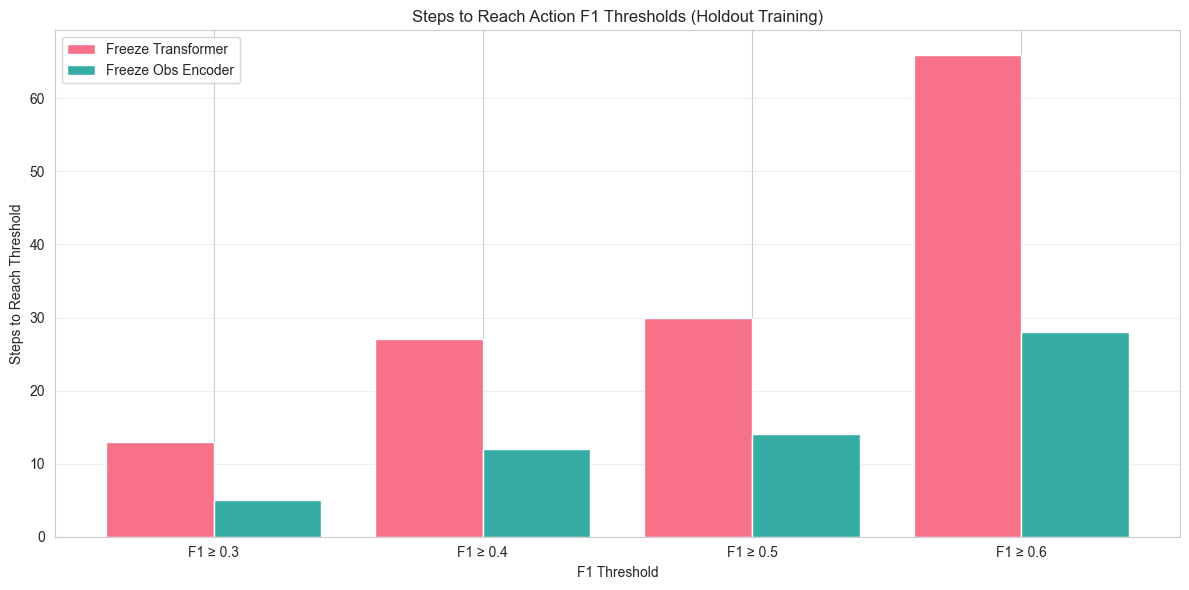


EXPERIMENT COMPARISON SUMMARY

Freeze Transformer:
----------------------------------------
  Total holdout training steps: 140
  Final holdout val loss: 1.8670
  Steps to reach F1 thresholds:
    F1 ≥ 0.3: 13 steps
    F1 ≥ 0.4: 27 steps
    F1 ≥ 0.5: 30 steps
    F1 ≥ 0.6: 66 steps

Freeze Obs Encoder:
----------------------------------------
  Total holdout training steps: 140
  Final holdout val loss: 1.7328
  Steps to reach F1 thresholds:
    F1 ≥ 0.3: 5 steps
    F1 ≥ 0.4: 12 steps
    F1 ≥ 0.5: 14 steps
    F1 ≥ 0.6: 28 steps



{'steps_to_f1_threshold': {'Freeze Transformer': {0.3: 13,
   0.4: 27,
   0.5: 30,
   0.6: 66},
  'Freeze Obs Encoder': {0.3: 5, 0.4: 12, 0.5: 14, 0.6: 28}}}

In [14]:
from mgdt_model_stats import experiment_comparison

experiments = [
    load_experiment_data("Freeze Transformer", base_dir.joinpath("freeze_transformer")),
    load_experiment_data("Freeze Obs Encoder", base_dir.joinpath("freeze_obs_encoder")),
]

experiment_comparison(experiments, output_dir=base_dir.joinpath("experiment_comparison"))